In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("diabetes.csv",sep=",")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# data model
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

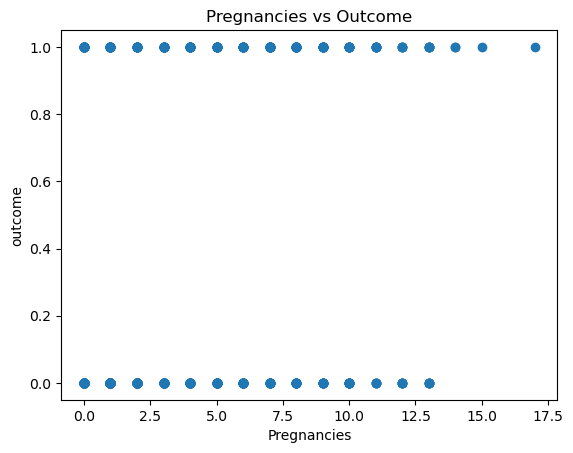

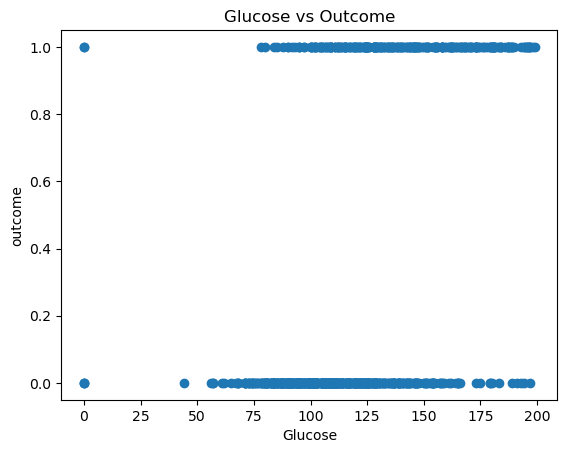

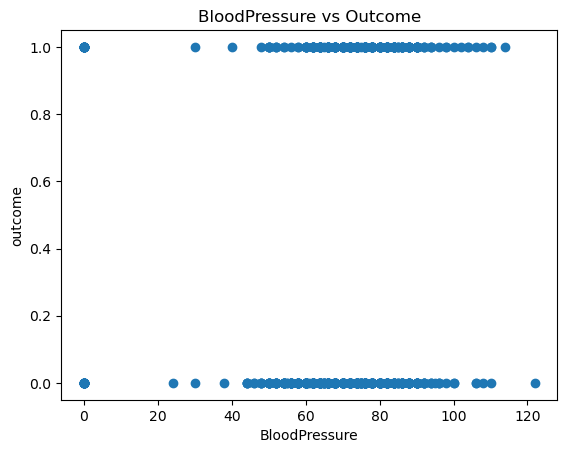

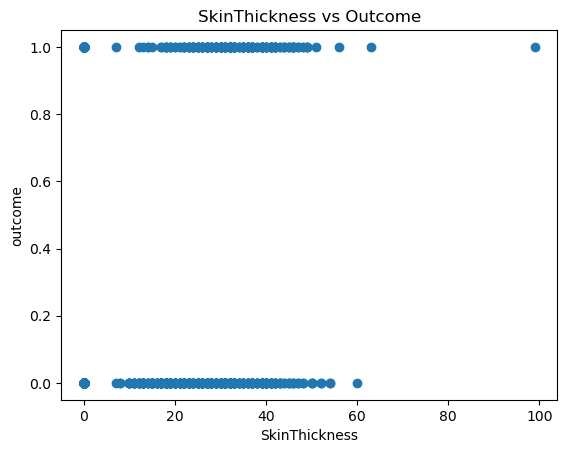

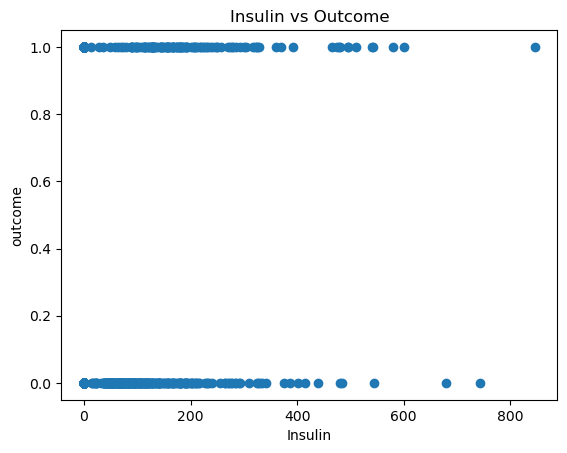

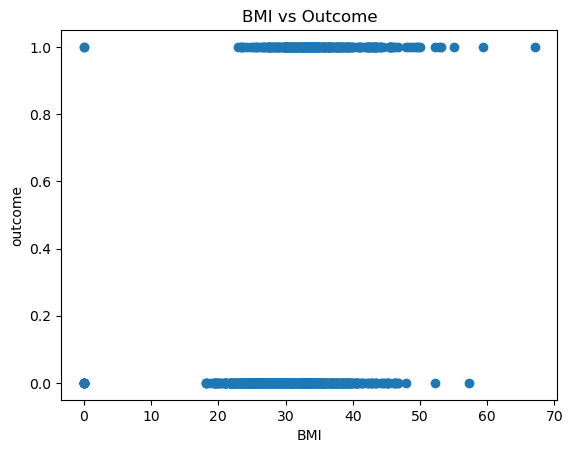

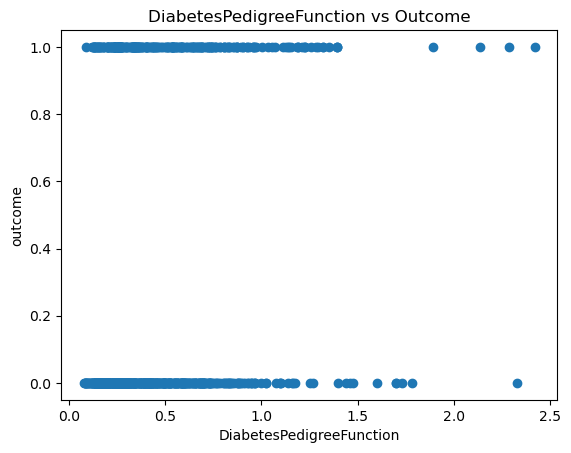

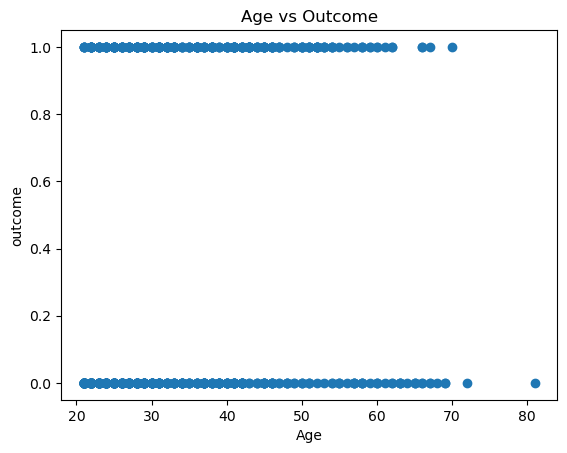

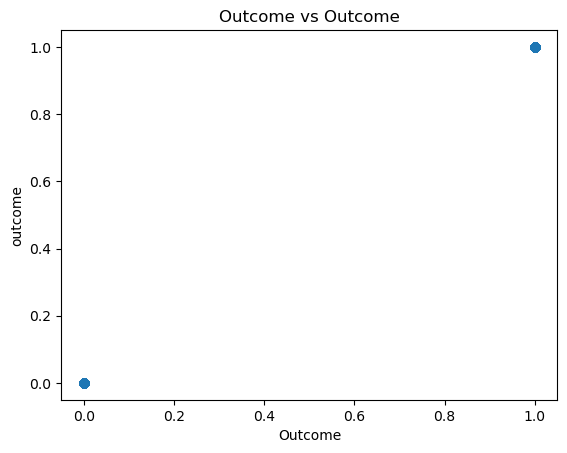

In [5]:
for i in df:
#     print(df[i])
    plt.scatter(df[i],df.Outcome)
    plt.title(f"{i} vs Outcome")
    plt.xlabel(i)
    plt.ylabel("outcome")
    plt.show()

In [11]:
data=df.drop("Outcome", axis=1)
output=df["Outcome"]

# feature selection

In [34]:
from sklearn.feature_selection import SelectKBest, chi2
# Feature Selection
selector = SelectKBest(score_func=chi2, k=5)  # Example using chi-square test
X_selected = selector.fit_transform(data, output)

In [42]:
#selected features
selected_indices = selector.get_support(indices=True)

print(data.columns[selected_indices])

Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age'], dtype='object')


# preparing dataset

In [13]:
from sklearn.model_selection import train_test_split

In [43]:
from sklearn.preprocessing import StandardScaler
# Scale the input data
scaler = StandardScaler()
data=scaler.fit_transform(X_selected)

In [44]:
X_train,X_test,y_train,y_test=train_test_split(data,output,test_size=0.2, random_state=42)

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [46]:
model.fit(X_train,y_train)

LogisticRegression()

In [47]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7402597402597403


In [50]:
model.predict(scaler.transform(selector.transform([[6,148,72,35,0,33.6,0.627,50]])))[0]

C:\Users\Aadhi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(


1

# random forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

#Predicions:
y_pred = model.predict(X_test)

In [58]:

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7272727272727273


In [59]:
model.predict(scaler.transform(selector.transform([[6,148,72,35,0,33.6,0.627,50]])))[0]

C:\Users\Aadhi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(


1

# Naive bayes

In [62]:
from sklearn.naive_bayes import GaussianNB

In [63]:
# Create a Multinomial Naive Bayes classifier
model = GaussianNB()

# Train the classifier
model.fit(X_train,y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7597402597402597


# SVM

In [64]:
from sklearn.svm import SVC

In [65]:

# Scale the features using StandardScaler
model = SVC(kernel='linear')

# Train the classifier
model.fit(X_train,y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7467532467532467
